<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/PRACTICA19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
df = pd.read_csv(url, header=None, names=column_names)

df['status'] = df['status'].map({1: 'Sobrevivió', 2: 'Falleció'}).astype('category')

print(df.head())

df.info()

   age  year  nodes      status
0   30    64      1  Sobrevivió
1   30    62      3  Sobrevivió
2   30    65      0  Sobrevivió
3   31    59      2  Sobrevivió
4   31    65      4  Sobrevivió
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB


In [10]:
# Separar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['category']).columns.tolist()


In [13]:
# 3. ANÁLISIS DE VALORES FALTANTES
print("\n--- 3. Buscando valores faltantes ---")
print(df.isnull().sum())


--- 3. Buscando valores faltantes ---
age       0
year      0
nodes     0
status    0
dtype: int64


In [14]:
# 4. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
print("\nDescripción estadística de las variables numéricas:")
print(df[numeric_cols].describe())



Descripción estadística de las variables numéricas:
              age        year       nodes
count  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144
std     10.803452    3.249405    7.189654
min     30.000000   58.000000    0.000000
25%     44.000000   60.000000    0.000000
50%     52.000000   63.000000    1.000000
75%     60.750000   65.750000    4.000000
max     83.000000   69.000000   52.000000


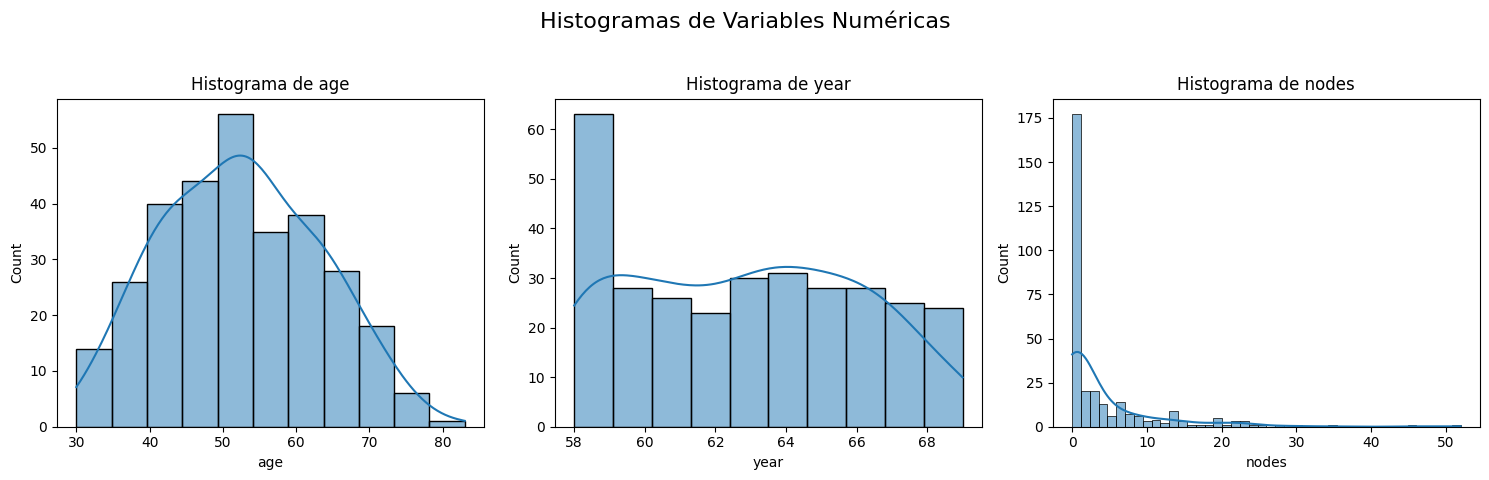

In [15]:
# --- Histogramas ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

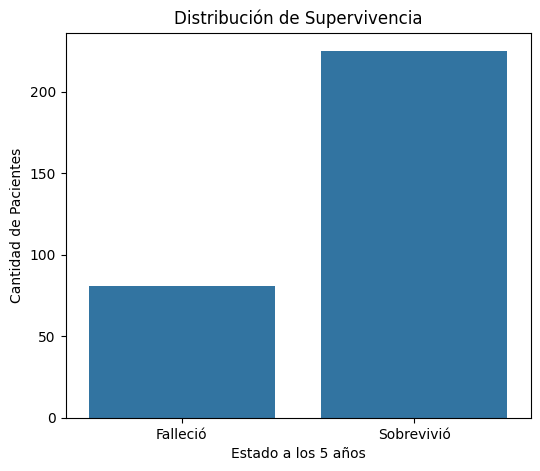

In [16]:
# --- Gráfica de Barras para 'status' ---
plt.figure(figsize=(6, 5))
sns.countplot(x='status', data=df)
plt.title('Distribución de Supervivencia')
plt.ylabel('Cantidad de Pacientes')
plt.xlabel('Estado a los 5 años')
plt.show()

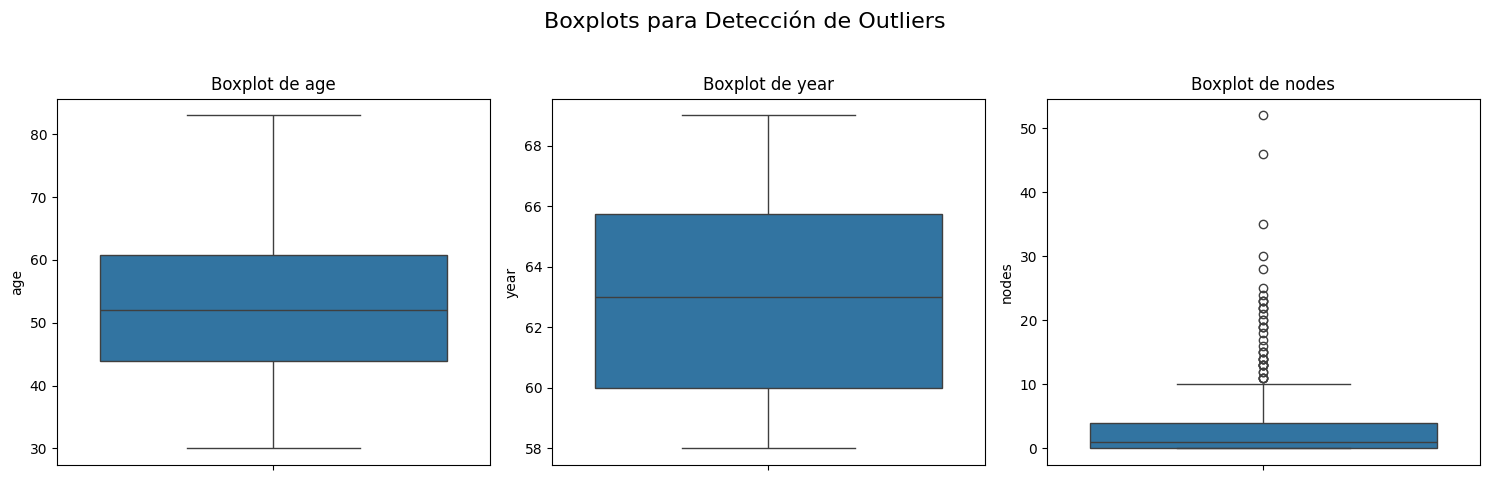

In [17]:
# --- Boxplots ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.suptitle("Boxplots para Detección de Outliers", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

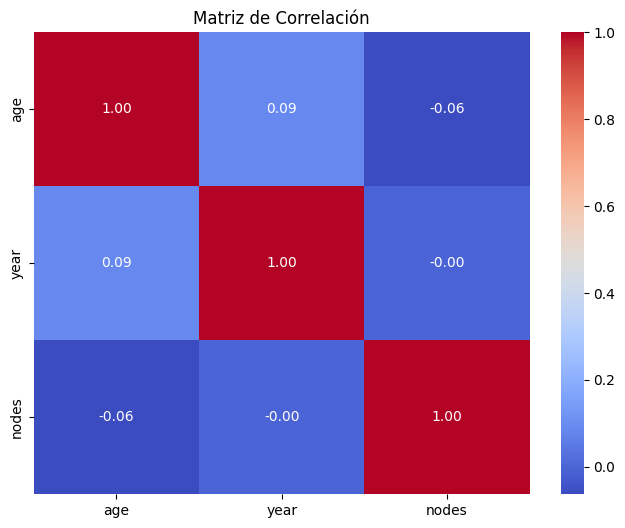

In [18]:
# --- Matriz de Correlación y Mapa de Calor ---
plt.figure(figsize=(8, 6))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

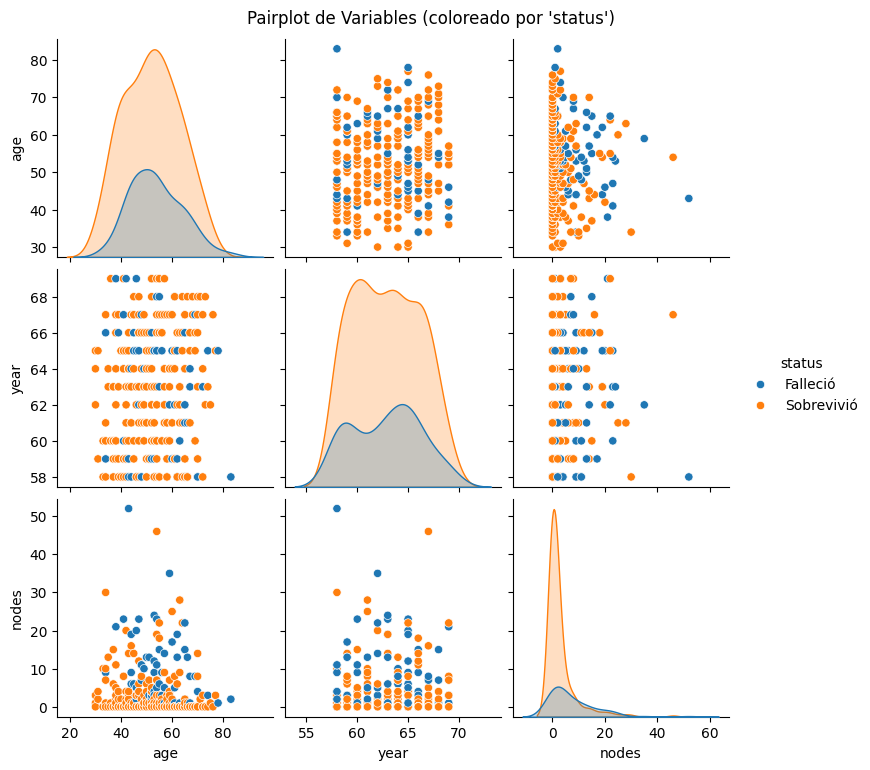

In [19]:
# --- Pairplot ---
sns.pairplot(df, hue='status', diag_kind='kde')
plt.suptitle("Pairplot de Variables (coloreado por 'status')", y=1.02)
plt.show()


--- 5. Realizando Pruebas de Normalidad ---

Variable: age
Prueba de Shapiro-Wilk: p-value = 0.0260
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.

Variable: year
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.

Variable: nodes
Prueba de Shapiro-Wilk: p-value = 0.0000
  -> Conclusión: La muestra NO parece provenir de una distribución Normal.


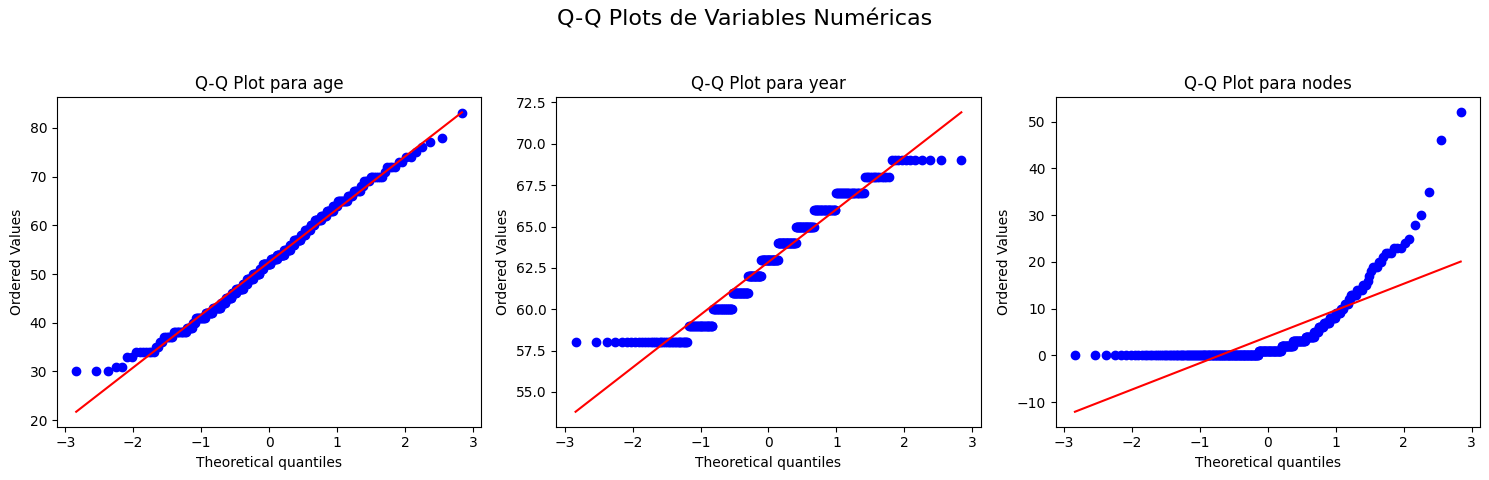

In [20]:
#5. PRUEBAS DE NORMALIDAD Y QQ-PLOTS

print("\n--- 5. Realizando Pruebas de Normalidad ---")
plt.figure(figsize=(15, 5))
alpha = 0.05
for i, col in enumerate(numeric_cols):
    # Prueba de Shapiro-Wilk
    stat, p_shapiro = stats.shapiro(df[col])
    print(f"\nVariable: {col}")
    print(f'Prueba de Shapiro-Wilk: p-value = {p_shapiro:.4f}')
    if p_shapiro > alpha:
        print("  -> Conclusión: La muestra parece provenir de una distribución Normal.")
    else:
        print("  -> Conclusión: La muestra NO parece provenir de una distribución Normal.")

    # QQ-Plot
    plt.subplot(1, 3, i + 1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot para {col}')

plt.suptitle("Q-Q Plots de Variables Numéricas", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

